<a href="https://colab.research.google.com/github/PawelJakubczyk/ham_or_spam_classifier/blob/main/spam_or_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup: Install Required Libraries
<a id="section1"></a>

In [16]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install spycy
%pip install nlpaug
# %pip install googletrans
%pip install concurrent
%pip install textaugment

ERROR: Could not find a version that satisfies the requirement concurrent (from versions: none)
ERROR: No matching distribution found for concurrent


# Data Sorce

## https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

# Import Libraries
<a id="section2"></a>

In [17]:
# import json
# import string
# import numpy as np
# import pandas as pd
# import re, nltk, spacy, string
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# # import en_core_web_sm
# nlp = spacy.load("en_core_web_sm")
# # stopwords = nlp.Defaults.stop_words
# from spacy.lang.en.stop_words import STOP_WORDS
# # stop_words = set(stopwords.words('english'))
# from nltk.stem import PorterStemmer
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from pprint import pprint
# from sklearn.decomposition import NMF
# from sklearn import preprocessing
# from nltk import ngrams
# from nltk import FreqDist
# from sklearn.decomposition import LatentDirichletAllocation as LDA
# # nltk.download('all')
# from nltk import pos_tag
# import joblib



# # charts
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# from plotly.offline import plot
# import plotly.graph_objects as go
# import plotly.express as px
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# %matplotlib inline

# #warnings
# import warnings
# warnings.filterwarnings('ignore')

# #options
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from pprint import pprint

# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', 500)

# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier


# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV

# from sklearn import metrics
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_recall_fscore_support

# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.preprocessing import StandardScaler

In [18]:
# # Typing
# from typing import Set
# # Data libraries
# import numpy as np
# import pandas as pd
# # Visualization libraries
# from matplotlib import pyplot as plt
# import seaborn as sns
# import missingno as msno
# # Data preprocessing
# from nltk import download, word_tokenize, FreqDist
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# # from googletrans import Translator
# from re import sub
# import string
# # Machine Learning
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score
#

In [37]:
# Read manage data
import pandas as pd
from concurrent.futures import ProcessPoolExecutor

# Data Preprocesing
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from typing import Set
from re import sub
import string
import nltk
import spacy

# data augmentation
from textaugment import Wordnet

# Visualisation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Define Functions

### Data cleaning

1. **remove_punctuation(input_string: str) -> str**:
   This function removes punctuation marks from the input string.

2. **replace_tabs_enters_and_spaces(input_string:str) -> str**:
   This function takes an input string and replaces tabs with a single space and multiple consecutive spaces with a single space.

3. **remove_stopwords(input_string: str, stop_words: Set[str]) -> str**:
   This function removes stopwords from the input string. Stopwords are commonly used words (e.g., "the", "is", "in") that do not carry significant meaning.

4. **lemmatize(text: str) -> str**:
   This function lemmatizes the input text. Lemmatization is similar to stemming but considers the context of the word to determine its base or dictionary form.

5. **stemming(text: str) -> str**:
   This function performs stemming on the input text. Stemming reduces words to their root or base form, often by removing suffixes.

6. **remove_pos_tags(text: str) -> str**:
   This function removes all words from the input text except for nouns (NN). It relies on part-of-speech tagging to identify and retain only nouns in the text.

In [59]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
STOP_WORDS = nlp.Defaults.stop_words
stemmer = PorterStemmer()

def remove_punctuation(input_string: str) -> str:
    """Removes punctuation from the input string"""
    return input_string.translate(str.maketrans('', '', string.punctuation))

def replace_tabs_enters_and_spaces(input_string:str) -> str:
    """Replaces tabs with a single space and multiple spaces with a single space in the input string"""
    replaced_tabs = sub(r'\t', ' ', input_string)
    replace_enters = sub(r'\n', ' ', replaced_tabs)
    replaced_spaces = sub(r'\s+', ' ', replace_enters)
    return replaced_spaces

def remove_stopwords(input_string: str) -> str:
    """Removes stopwords from the input string"""
    words = input_string.split()
    filtered_words = [word for word in words if word.lower() not in STOP_WORDS]
    return ' '.join(filtered_words)

def lemmatize(input_string: str)-> str:
    """Lemmatizes the input text"""
    doc = nlp(input_string)
    sent = [token.lemma_ for token in doc if token.text not in STOP_WORDS]
    return ' '.join(sent)

def stemming(input_string: str)-> str:
    """Performs stemming on the input text"""
    tokens = word_tokenize(input_string)
    stem_words = [stemmer.stem(word) for word in tokens]
    return ' '.join(stem_words)

def remove_pos_tags(input_string: str)-> str:
    """Removes all words except nouns (NN) from the input text"""
    doc = nlp(input_string)
    sent = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sent)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Merge functions for preprocesing

In [60]:
def preprocess_text(input_string: str) -> str:
    """Preprocesses the input text by applying a series of text processing steps."""
    # Step 1: Remove punctuation
    processed_text = remove_punctuation(input_string)
    # Step 2: Replace tabs, enters, and multiple spaces with single spaces
    processed_text = replace_tabs_enters_and_spaces(processed_text)
    # Step 3: Remove stopwords
    processed_text = remove_stopwords(processed_text)
    # Step 4: Lemmatize the text
    processed_text = lemmatize(processed_text)
    # Step 5: Perform stemming
    processed_text = stemming(processed_text)
    # Step 6: Remove POS tags, keeping only nouns
    processed_text = remove_pos_tags(processed_text)

    return processed_text

### Data translate

In [22]:
def translate_to_english(input_string:str) -> str:
    """Translates the input string to English using the Google Translate API."""
    translator = Translator()
    try:
        return translator.translate(input_string, dest='en').text
    except Exception:
        print(f"Translation Error: {Exception}")
    return input_string

### Data augmentation

1. **augment_data(data, topic_col, text_col) -> DataFrame**: Data augmentation is a technique used to artificially increase the size of a dataset by creating modified versions of existing data samples. The `augment_data` function implements this technique by generating additional samples for underrepresented topics in the input data.

In [23]:
def augment_data(data, topic_col, text_col):
    """Augments the input data by generating additional samples for underrepresented topics."""

    topic_counts = data[topic_col].value_counts()  # get the topic counts
    max_count = topic_counts.max()  # max items for main topic

    augmented_data = []
    wordnet_aug = WordNetAug(v=True)  # use Wordnet for synonyms

    # Loop through each topic to create additional data
    for topic, count in topic_counts.items():
        # Get data corresponding to the current topic
        topic_data = data[data[topic_col] == topic]

        # Calculate the number of additional samples needed for this topic
        samples_needed = max_count - count  # find how many text data we need to add for each group

        # Perform augmentation
        augmented_sentences = []
        while len(augmented_sentences) < samples_needed:
            # Augment a randomly selected text from the current topic
            augmented_sentence = wordnet_aug.augment(topic_data[text_col].sample().iloc[0])
            augmented_sentences.append(augmented_sentence)

        # Create a new DataFrame with merged newly created samples and topics
        augmented_df = pd.DataFrame({topic_col: [topic] * len(augmented_sentences),
                                      text_col: augmented_sentences})

        # Add the augmented samples to the list
        augmented_data.append(augmented_df)

    # Merge the newly created DataFrame with samples and the original data
    augmented_data = pd.concat([data] + augmented_data, ignore_index=True)

    # Return the augmented data
    return augmented_data

### Data Analize

In [29]:
def analyze_word_frequency_in_df_column(df: pd.DataFrame, column_name: str, top_num: int) -> dict:
    all_text = ' '.join(df[column_name].tolist())
    words = word_tokenize(all_text)
    fdist = FreqDist(words)
    most_common_words = dict(fdist.most_common(top_num))

    return most_common_words

### Text tokenization

In [30]:
def tokenize_text(input_string):
    # Tokenize the text into words
    tokens = word_tokenize(input_string)

    return tokens

# Read the spam data from a CSV file

In [56]:
dtype_dict = {'Message': str, 'Category': str}
spam_df=pd.read_csv('/content/spam.csv', dtype=dtype_dict)

# Data Analisis

### Data prefactoring

In [57]:
with ProcessPoolExecutor() as executor:
    spam_df['Message'] = list(executor.map(preprocess_text, spam_df['Message']))


In [62]:
spam_df.head(20)

,Category,Message
0,ham,world wat
1,ham,oni
2,spam,wkli comp win 21st text receiv txt ratetc appli
3,ham,c
4,ham,
5,spam,darl week word fun rcv
6,ham,brother aid patent
7,ham,caller press
8,spam,network custom receivea prize reward claim cod...
9,spam,month entitl


In [63]:
print(spam_df.shape)

(5572, 2)


In [64]:
msno.matrix(spam_df).set_title('Distribution of missing values',fontsize=20)

NameError: name 'msno' is not defined

In [ ]:
# No missing value in the dataframe

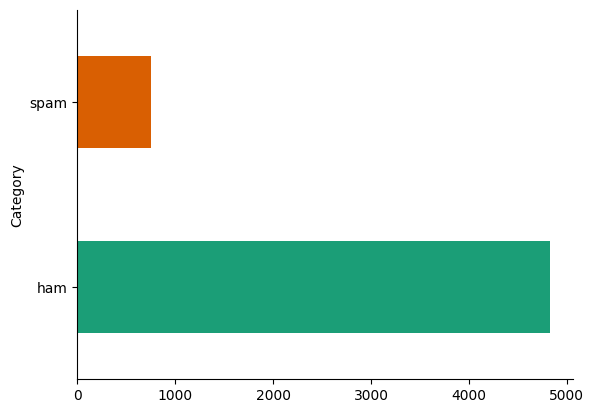

In [ ]:
# Plot the number of occurrences for each category
spam_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Enginering

## Remove specjal char

## Translate all message to english

In [ ]:
spam_df['Message'] = spam_df['Message'].apply(translate_to_english)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.Category, test_size=0.25)

NameError: ignored

In [ ]:
# Create a pipeline for the model
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [ ]:
# Fit the model on the training data
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
# Predict the categories for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Percentage coverage: {accuracy * 100}%")

Procent pokrycia: 98.77961234745155%
